In [1]:
import docx
import os
import exception
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
R= ["resume_test_100/"+i.name for i in os.scandir("resume_test_100")]
Resume_combine = []
for i in R:
    #print(i)
    b= docx.Document(i)
    Resume_combine.append("\n".join([i.text for i in b.paragraphs]))
print(R)  
#print(Resume_combine)

['resume_test_100/0000 Program Mgr Abe Nasser NN Google  Resume - November 2016.docx', 'resume_test_100/04-Swamy_Sarnala.docx', 'resume_test_100/07-VamsiManoharBojjaResume java (1).docx', 'resume_test_100/08-2017-Saiyid Maududi-Updated-PA-CV-DM-PTP-TL.DOCX', 'resume_test_100/09-Sultana shaik-SAP Native HANA.docx', 'resume_test_100/1.1.1.1 Solutions - Application Delivery - Solution Architect (GC&E).docx', 'resume_test_100/1.1.1.1 Solutions - Application Delivery - Solution Architect.docx', 'resume_test_100/1.docx', 'resume_test_100/123Mallareddy_Mulesoft123.docx', 'resume_test_100/1495020666795.RSO - Full Stack Developer.docx', 'resume_test_100/1BhanuChandher_Sr MSCRM_Developer_ASP.NET.docx', 'resume_test_100/2017Resume.docx', 'resume_test_100/2188845-JD_CA_Java_Middleware_Developer-Sunnyvale.docx', 'resume_test_100/4 SARAVANA_SAP_Security_SSK.docx', 'resume_test_100/4+years Devops -Ramakrishna.docx', 'resume_test_100/4677_22924_1507756493Satish-resume.docx', 'resume_test_100/4677_2668

In [2]:
Resume_dataF= pd.DataFrame(Resume_combine,index=range(1,100))
Resume_dataF.drop([1,1],inplace= True)
Resume_dataF

,0
2,Swamy Sarnala\nContact: +1 (816)-875-3748\nE-m...
3,Vamsi Manohar Bojja\n(903) 830-0647 | vamsiman...
4,Saiyid Maududi\nStatus: US Citizen\n 21W025 M...
5,SULTANA SHAIK\n\n(612)636-7951\n\nProfessional...
6,Job description – Global Collaboration & Enabl...
...,...
95,Abhilash Maroju\nMob: (831)288-5535\nEmail: ab...
96,AbhilashBonala\nabhilashjava6@gmail.com\n662-4...
97,ABHILASH\n201-639-4599\nabhilash023.cpp@gmail....
98,ABHILASH\n201-639-4599\nabhilash023.cpp@gmail....


In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus= []
for i in range(2,100):
    row_d=re.sub('[^a-zA-Z]',' ',Resume_dataF[0][i]) #non letter will be replace by space
    row_d=row_d.lower()
    row_d=row_d.split()
    #ps= PorterStemmer()
    all_stopwords= stopwords.words('english')
    #all_stopwords.remove('not') #it will remove not word from the stopword
    row_d= [(word) for word in row_d if word not in all_stopwords]
    review= ' '.join(row_d)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
corpus

['swamy sarnala contact e mail summary years experience esb soa related technologies using muelsoft message broker good exposure mulesoft api platform cloudhub experience developing mule flows anypoint studio experience configuration endpoints work flow good knowledge exception handling unit testing muleesb able design code mule flows asynchronous messaging data transformation routing batch processing good experience mule configuration deployment performance tuning good knowledge postman web services testing good experience implementing service oriented architectures soa using xmlbased web services soap wsdl rest web services strong skills designing building api using raml developed flows using apikit router experience developing mule applications using groovy custom java classes strong experience integration using mule esb integration various third party solutions good knowledge implementing rest api used api gateway proxy service excellent skills development middleware frameworks rou

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

T_vectorizer = TfidfVectorizer(stop_words='english')
Tf = T_vectorizer.fit_transform(corpus)
print(Tf)

  (0, 6145)	0.017334330875132493
  (0, 382)	0.015900527217700397
  (0, 4303)	0.010209241040142817
  (0, 2687)	0.005488417043504492
  (0, 2589)	0.009981020249248962
  (0, 2585)	0.012904316824096132
  (0, 8110)	0.005307033956220464
  (0, 713)	0.007878019993156396
  (0, 2543)	0.004916821716510216
  (0, 4330)	0.017334330875132493
  (0, 3913)	0.015900527217700397
  (0, 751)	0.012904316824096132
  (0, 7328)	0.014883227333171316
  (0, 4118)	0.015900527217700397
  (0, 1994)	0.014426061293077101
  (0, 5334)	0.018383882311227468
  (0, 1117)	0.023286089395149822
  (0, 146)	0.008402862061978506
  (0, 5343)	0.010998320133778043
  (0, 3200)	0.018038819249405726
  (0, 4209)	0.022612018646958606
  (0, 1120)	0.011643044697574911
  (0, 1843)	0.028693549429037856
  (0, 3033)	0.007529916707287786
  (0, 1276)	0.014094148239536088
  :	:
  (97, 7313)	0.014434167284389331
  (97, 3875)	0.015046072888177546
  (97, 7315)	0.008956230762930742
  (97, 8847)	0.02216366622105326
  (97, 8413)	0.08452752364021372
  (97

In [6]:
#print the scores
df = pd.DataFrame(Tf.todense(),columns=T_vectorizer.get_feature_names())
#df.sort_values(by=[T_vectorizer.get_feature_names()],ascending=False)
df

,aad,aadsync,aakash,aakashmayur,aalap,aalok,aaron,aarp,aarti,aarzoo,...,zone,zones,zoom,zope,zos,zti,zurich,zycus,zydus,zypper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00591,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.055062,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

ValueError: could not convert string to float: 'resume_test_100/Abhi_DB2_DBA (1).docx'

In [8]:
kmeans= KMeans(n_clusters=5,init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 0, 3, 4, 0, 0, 3, 0, 4, 0, 1, 4, 4, 2, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 3, 0, 3, 2, 3, 4, 3, 2, 4, 4, 3, 3, 2, 2, 0, 3, 3, 4, 4,
       0, 4, 4, 1, 3, 1, 4, 1, 1, 0, 1, 3, 2, 3, 2, 1, 3, 0, 0, 1, 0, 1,
       3, 0, 4, 1, 2, 0, 4, 3, 3, 0, 0, 3, 3, 3, 3, 1, 4, 4, 2, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 0, 0, 4])

In [9]:
R.remove("resume_test_100/0000 Program Mgr Abe Nasser NN Google  Resume - November 2016.docx")

In [10]:
#print(R)

In [11]:
df["Cluster"]=  y_kmeans
df["Resumes"]= R
df.head()

,aad,aadsync,aakash,aakashmayur,aalap,aalok,aaron,aarp,aarti,aarzoo,...,zoom,zope,zos,zti,zurich,zycus,zydus,zypper,Cluster,Resumes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,resume_test_100/04-Swamy_Sarnala.docx
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,resume_test_100/07-VamsiManoharBojjaResume jav...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,resume_test_100/08-2017-Saiyid Maududi-Updated...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,resume_test_100/09-Sultana shaik-SAP Native HA...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,resume_test_100/1.1.1.1 Solutions - Applicatio...


In [13]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
do =df.drop(["Cluster","Resumes"],axis=1)
X= pca.fit_transform(do)[:,0]
X
Y=pca.fit_transform(do)[:,1]

In [14]:
new_df= df[["Cluster","Resumes"]]
new_df["X"]= X
new_df["Y"]= Y

C:\Users\HP\Documents\Python_All\Resume_parser\Resume_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Documents\Python_All\Resume_parser\Resume_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
new_df.head()

,Cluster,Resumes,X,Y
0,0,resume_test_100/04-Swamy_Sarnala.docx,0.166985,0.026754
1,0,resume_test_100/07-VamsiManoharBojjaResume jav...,0.377204,0.060287
2,3,resume_test_100/08-2017-Saiyid Maududi-Updated...,-0.125877,-0.139414
3,4,resume_test_100/09-Sultana shaik-SAP Native HA...,-0.100160,-0.077762
4,0,resume_test_100/1.1.1.1 Solutions - Applicatio...,-0.148059,-0.034019


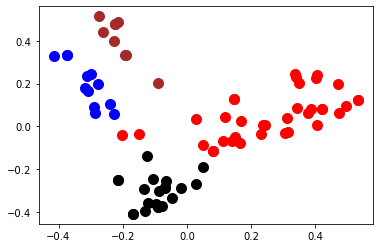

In [16]:
plt.scatter(x= new_df[new_df.Cluster == 0]['X'], y= new_df[new_df.Cluster == 0]['Y'],s=100,c='red') #[y_kmeans==0
plt.scatter(x= new_df[new_df.Cluster == 1]['X'], y= new_df[new_df.Cluster == 1]['Y'],s=100,c='blue')
plt.scatter(x= new_df[new_df.Cluster == 2]['X'], y= new_df[new_df.Cluster == 2]['Y'],s=100,c="brown")
plt.scatter(x= new_df[new_df.Cluster == 3]['X'], y= new_df[new_df.Cluster == 3]['Y'],s=100,c="black")

In [17]:
import plotly as py 
import cufflinks as cf
import nbformat
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)

cf.go_offline()

In [18]:
trace_0 = py.graph_objs.Scatter(x= new_df[new_df.Cluster == 0]['X'],
                    y= new_df[new_df.Cluster == 0]['Y'],
                    name= "Cluster1",
                    mode= 'markers',
                    marker= dict(size=10,
                                color= "rgba(18,180,152,0.5)",
                                line= dict(width= 1,color= "red")))
trace_1 = go.Scatter(x= new_df[new_df.Cluster == 1]['X'],
                    y= new_df[new_df.Cluster == 1]['Y'],
                    name= "Cluster2",
                    mode= 'markers',
                    marker= dict(size=10,
                                color= "rgba(15,152,152,0.5)",
                                line= dict(width= 1,color= "rgb(0,0,0)")))
trace_2 = go.Scatter(x= new_df[new_df.Cluster == 2]['X'],
                    y= new_df[new_df.Cluster == 2]['Y'],
                    name="Cluster3",
                    mode= 'markers',
                    marker= dict(size=10,
                                color= "rgba(19,150,155,0.5)",
                                line= dict(width= 1,color= "rgb(0,0,0)")))
trace_3 = go.Scatter(x= new_df[new_df.Cluster == 3]['X'],
                    y= new_df[new_df.Cluster == 3]['Y'],
                    name= "Cluster4",
                    mode= 'markers',
                    marker= dict(size=10,
                                color= "rgba(16,550,158,0.5)",
                                line= dict(width= 1,color= "rgb(0,0,0)")))
trace_4 = go.Scatter(x= new_df[new_df.Cluster == 4]['X'],
                    y= new_df[new_df.Cluster == 4]['Y'],
                    name= "Cluster5",
                    mode= 'markers',
                    marker= dict(size=10,
                                color= "rgb(19,150,155,0.5)",
                                line= dict(width= 1,color= "rgb(0,0,0)")))
data= [trace_0,trace_1,trace_2,trace_3,trace_4]

print(nbformat.__version__)
fig = iplot(data)
fig.show()

5.0.7


AttributeError: 'NoneType' object has no attribute 'show'

In [19]:
import plotly.express as px
#df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(x= new_df[new_df.Cluster == 0]['X'],
                    y= new_df[new_df.Cluster == 0]['Y'])
fig.show()